## Exercise SVM - Gender Recognition by Voice and Speech Analysis

This dataset was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (<a href="https://en.wikipedia.org/wiki/Voice_frequency#Fundamental_frequency">human vocal range</a>).

The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness 
- kurt: kurtosis 
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

## Library and Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('voice.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

There are 21 features and 3168 instances.

## EDA

We start by checking if the dataset has missing values and the results show that there are no null values.

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


<AxesSubplot:>

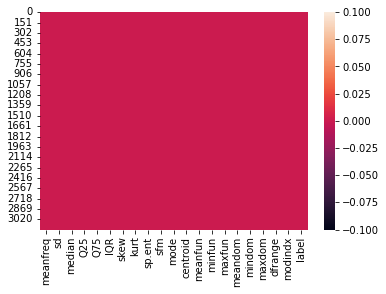

In [4]:
print(df.isna().sum())
sns.heatmap(df.isna())

<AxesSubplot:xlabel='label', ylabel='count'>

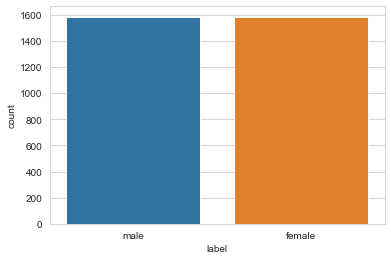

In [5]:
sns.set_style("whitegrid")
sns.countplot(x='label',data=df)

In [6]:
# alternate way of checking labels
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


We see that our data is balanced; there are equal number of male and female labels.

<AxesSubplot:xlabel='label', ylabel='meanfreq'>

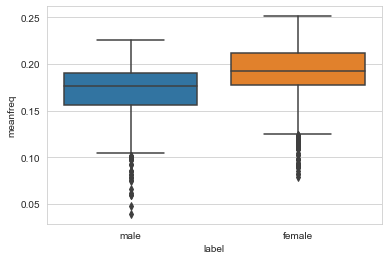

In [7]:
sns.boxplot(x="label",y="meanfreq",data=df)

<AxesSubplot:xlabel='label', ylabel='dfrange'>

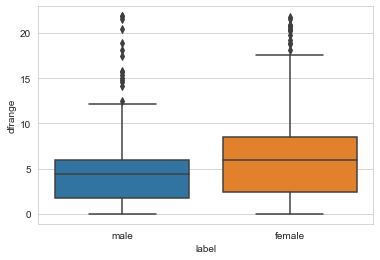

In [8]:
sns.boxplot(x="label",y="dfrange",data=df)

## Data Cleaning

We see that label column is categorical (male, female). We need to convert it into dummy variable before creating our model

In [9]:
label_dummy=pd.get_dummies(df["label"], drop_first=True)

In [10]:
label_dummy.head()

,male
0,1
1,1
2,1
3,1
4,1


When interpreting our model performance using classification report, 1s will show males and 0s will show females. 

In [11]:
df=pd.concat([df,label_dummy],axis=1)

In [12]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,1


## Separating features and labels

In [13]:
X = df.drop(["label","male"],axis=1)
y = df["male"]

In [14]:
X. head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: male, dtype: uint8

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Scaling the data

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the Support Vector Classifier

In [18]:
from sklearn.svm import SVC
model = SVC() # Default parameters
model.fit(X_train,y_train)

SVC()

## Predictions and Evaluations

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[304   7]
 [  8 315]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## GridSearch

The model is performing quite well but let's see if we can improve it with GridSearch (not very likely!)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ["auto","scale"],'kernel': ['linear','rbf']} 

In [22]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.970 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.980 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.972 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.964 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.957 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.966 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.978 total time=   0.1s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.980 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [25]:
grid.best_estimator_

SVC(C=10, gamma='auto')

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[306   5]
 [  8 315]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



The accuracy remains the same. The only improvement is False Positives got reduced from 7 to 5.